## Import Libraries
We will start by importing the necessary libraries for this lab. We will use the scikit-learn library to generate the dataset and train the logistic regression models, and the matplotlib library to plot the decision boundary.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

## Generate Dataset
We will generate a 3-class dataset using the make_blobs function from scikit-learn. <br>
We will use 1000 samples and set the centers of the blobs to be at [-5, 0], [0, 1.5], [5, -1]. <br>
We will then transform the dataset using a transformation matrix to make the dataset more difficult to classify.

In [2]:
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

## Train Multinomial Logistic Regression Model
We will now train a multinomial logistic regression model using the LogisticRegression function from scikit-learn. <br>
We will set the solver to "sag", the maximum number of iterations to 100, the random state to 42, and the multi-class option to "multinomial". <br>
We will then print the training score of the model.

In [3]:
clf = LogisticRegression(
        solver="sag", max_iter=100, random_state=42, multi_class="multinomial"
    ).fit(X, y)

print("training score : %.3f (%s)" % (clf.score(X, y), "multinomial"))

training score : 0.995 (multinomial)


C:\Users\wujun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


## Plot Decision Boundary of Multinomial Logistic Regression Model
We will now plot the decision surface of the multinomial logistic regression model using the DecisionBoundaryDisplay function from scikit-learn. <br>
We will set the response method to "predict", the colormap to "plt.cm.Paired", and plot the training points as well.

C:\Users\wujun\AppData\Local\Temp\ipykernel_59644\1414520970.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


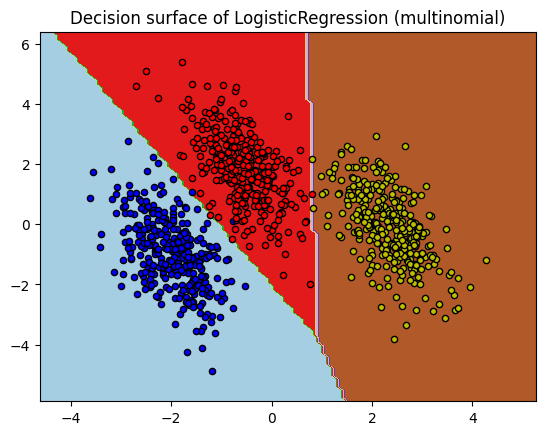

In [5]:
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
        clf, X, response_method="predict", cmap=plt.cm.Paired, ax=ax
    )
plt.title("Decision surface of LogisticRegression (multinomial)")
plt.axis("tight")

colors = "bry"
for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor="black", s=20
        )

## Train One-vs-Rest Logistic Regression Model
We will now train a one-vs-rest logistic regression model using the same parameters as in Step 3, but with the multi-class option set to "ovr". <br>
We will then print the training score of the model.

In [6]:
clf = LogisticRegression(
        solver="sag", max_iter=100, random_state=42, multi_class="ovr"
    ).fit(X, y)

print("training score : %.3f (%s)" % (clf.score(X, y), "ovr"))

training score : 0.976 (ovr)


C:\Users\wujun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


## Plot Decision Boundary of One-vs-Rest Logistic Regression Model
We will now plot the decision surface of the one-vs-rest logistic regression model using the same parameters as in Step 4, but plot the hyperplanes corresponding to the three one-vs-rest classifiers as dashed lines.

C:\Users\wujun\AppData\Local\Temp\ipykernel_59644\2623347506.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


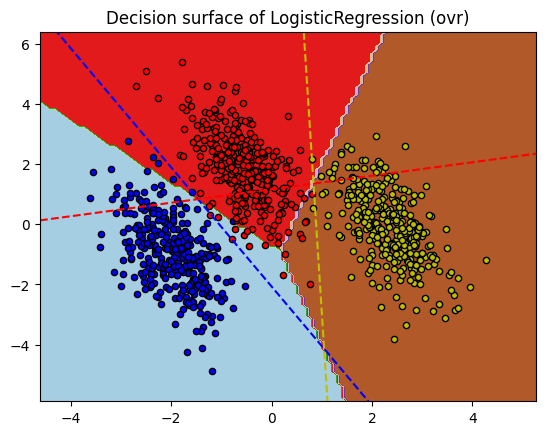

In [7]:
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
        clf, X, response_method="predict", cmap=plt.cm.Paired, ax=ax
    )
plt.title("Decision surface of LogisticRegression (ovr)")
plt.axis("tight")

colors = "bry"
for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor="black", s=20
        )

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_

def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

        plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)

for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

## Visualize Plots
We will now visualize both plots side by side to compare the decision boundaries of the two models.

C:\Users\wujun\AppData\Local\Temp\ipykernel_59644\596431546.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
C:\Users\wujun\AppData\Local\Temp\ipykernel_59644\596431546.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


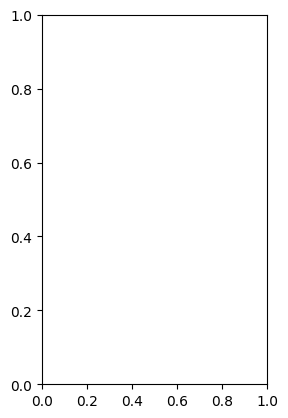

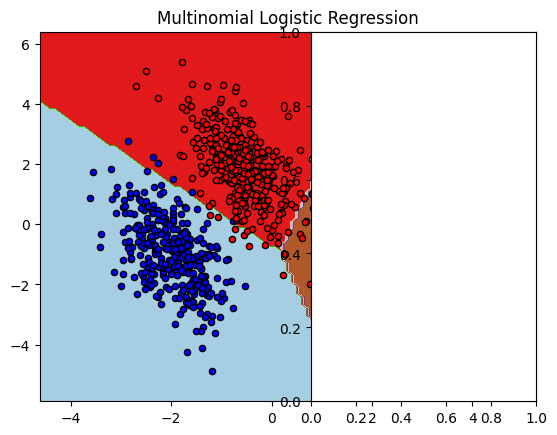

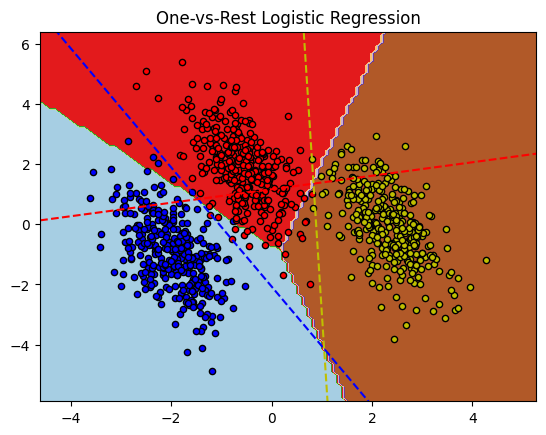

In [8]:
plt.subplot(1,2,1)
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
        clf, X, response_method="predict", cmap=plt.cm.Paired, ax=ax
    )
plt.title("Multinomial Logistic Regression")
plt.axis("tight")

colors = "bry"
for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor="black", s=20
        )

plt.subplot(1,2,2)
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
        clf, X, response_method="predict", cmap=plt.cm.Paired, ax=ax
    )
plt.title("One-vs-Rest Logistic Regression")
plt.axis("tight")

colors = "bry"
for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor="black", s=20
        )

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_

def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

        plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)

for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

plt.subplots_adjust(wspace=0.5)
plt.show()

## Summary
In this lab, we learned how to plot the decision surface of two logistic regression models, namely the multinomial logistic regression and the one-vs-rest logistic regression. We used a 3-class dataset and compared the performance of the two models by plotting their decision boundary. We observed that the multinomial logistic regression model had a smoother decision boundary, while the one-vs-rest logistic regression model had three separate decision boundaries for each class.